## About

This graph is a [lollipop plot](/lollipop-plot), designed to showcase a single value for each category, akin to a [barplot](/barplot) but substituting the bar with a line. This specific instance features an appealing background and includes annotations positioned to the right of the chart.

It has been originally designed by [Joseph Barbier](https://www.barbierjoseph.com). Thanks to him for sharing his work!

As a teaser, here is the plot we’re gonna try building:

![preview](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-lollipop-with-background-image.png?raw=true)


## Libraries

For creating this chart, we will need a whole bunch of libraries!

- [matplotlib](https://python-graph-gallery.com/matplotlib/): to customize the appearance of the chart
- [seaborn](https://python-graph-gallery.com/seaborn/): to create the chart
- [pandas](https://python-graph-gallery.com/pandas/): to handle the data
- [highlight_text](/advanced-custom-annotations-matplotlib) and `textwrap`: to add text annotations
- `PIL` for the background image


In [2]:
# main libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# image in the background
from PIL import Image
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# annotations
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch
import textwrap

## Dataset

The data can be accessed using the **url below**.


In [8]:
path = 'https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/rolling_stone.csv'
df = pd.read_csv(path)

# clean the data
replacements = {
   "Blues/Blues ROck": "Blues/Blues Rock",
   "Rock n' Roll/Rhythm & Blues": "Blues/Blues Rock"
}
df['genre_clean'] = df['genre'].replace(replacements)
df.drop(['spotify_url', 'sort_name', 'artist_birth_year_sum', 'genre'], axis=1, inplace=True)
df.dropna(subset=['differential'], inplace=True)
df = df[df['release_year']<=2003]
data = df.groupby('genre_clean')['differential'].mean().sort_values()
data = pd.DataFrame({
   'genre': data.index,
   'diff': data.values
})
data = data[~data['genre'].isin(['Afrobeat'])]
data.sort_values('diff', ascending=False, inplace=True)

# show first rows
data.head()

,genre,diff
13,Hip-Hop/Rap,156.955556
12,Electronic,83.222222
10,Indie/Alternative Rock,59.478261
9,Soul/Gospel/R&B,13.000000
8,Punk/Post-Punk/New Wave/Power Pop,-13.925926


## Add background image

1. **Load Background Image**: we first load a background image from a specified path and converts it into a NumPy array for manipulation.
2. **Initialize Chart with Background**: A figure and its axes are then initialized using matplotlib, where the loaded image is set as the background with a reduced opacity.
3. **Create Secondary Axes for Lollipop Chart**: A secondary axes area (sub_ax) is created on top of the main axes. This secondary area is intended for placing a lollipop chart and is sized and positioned to occupy the majority of the figure.


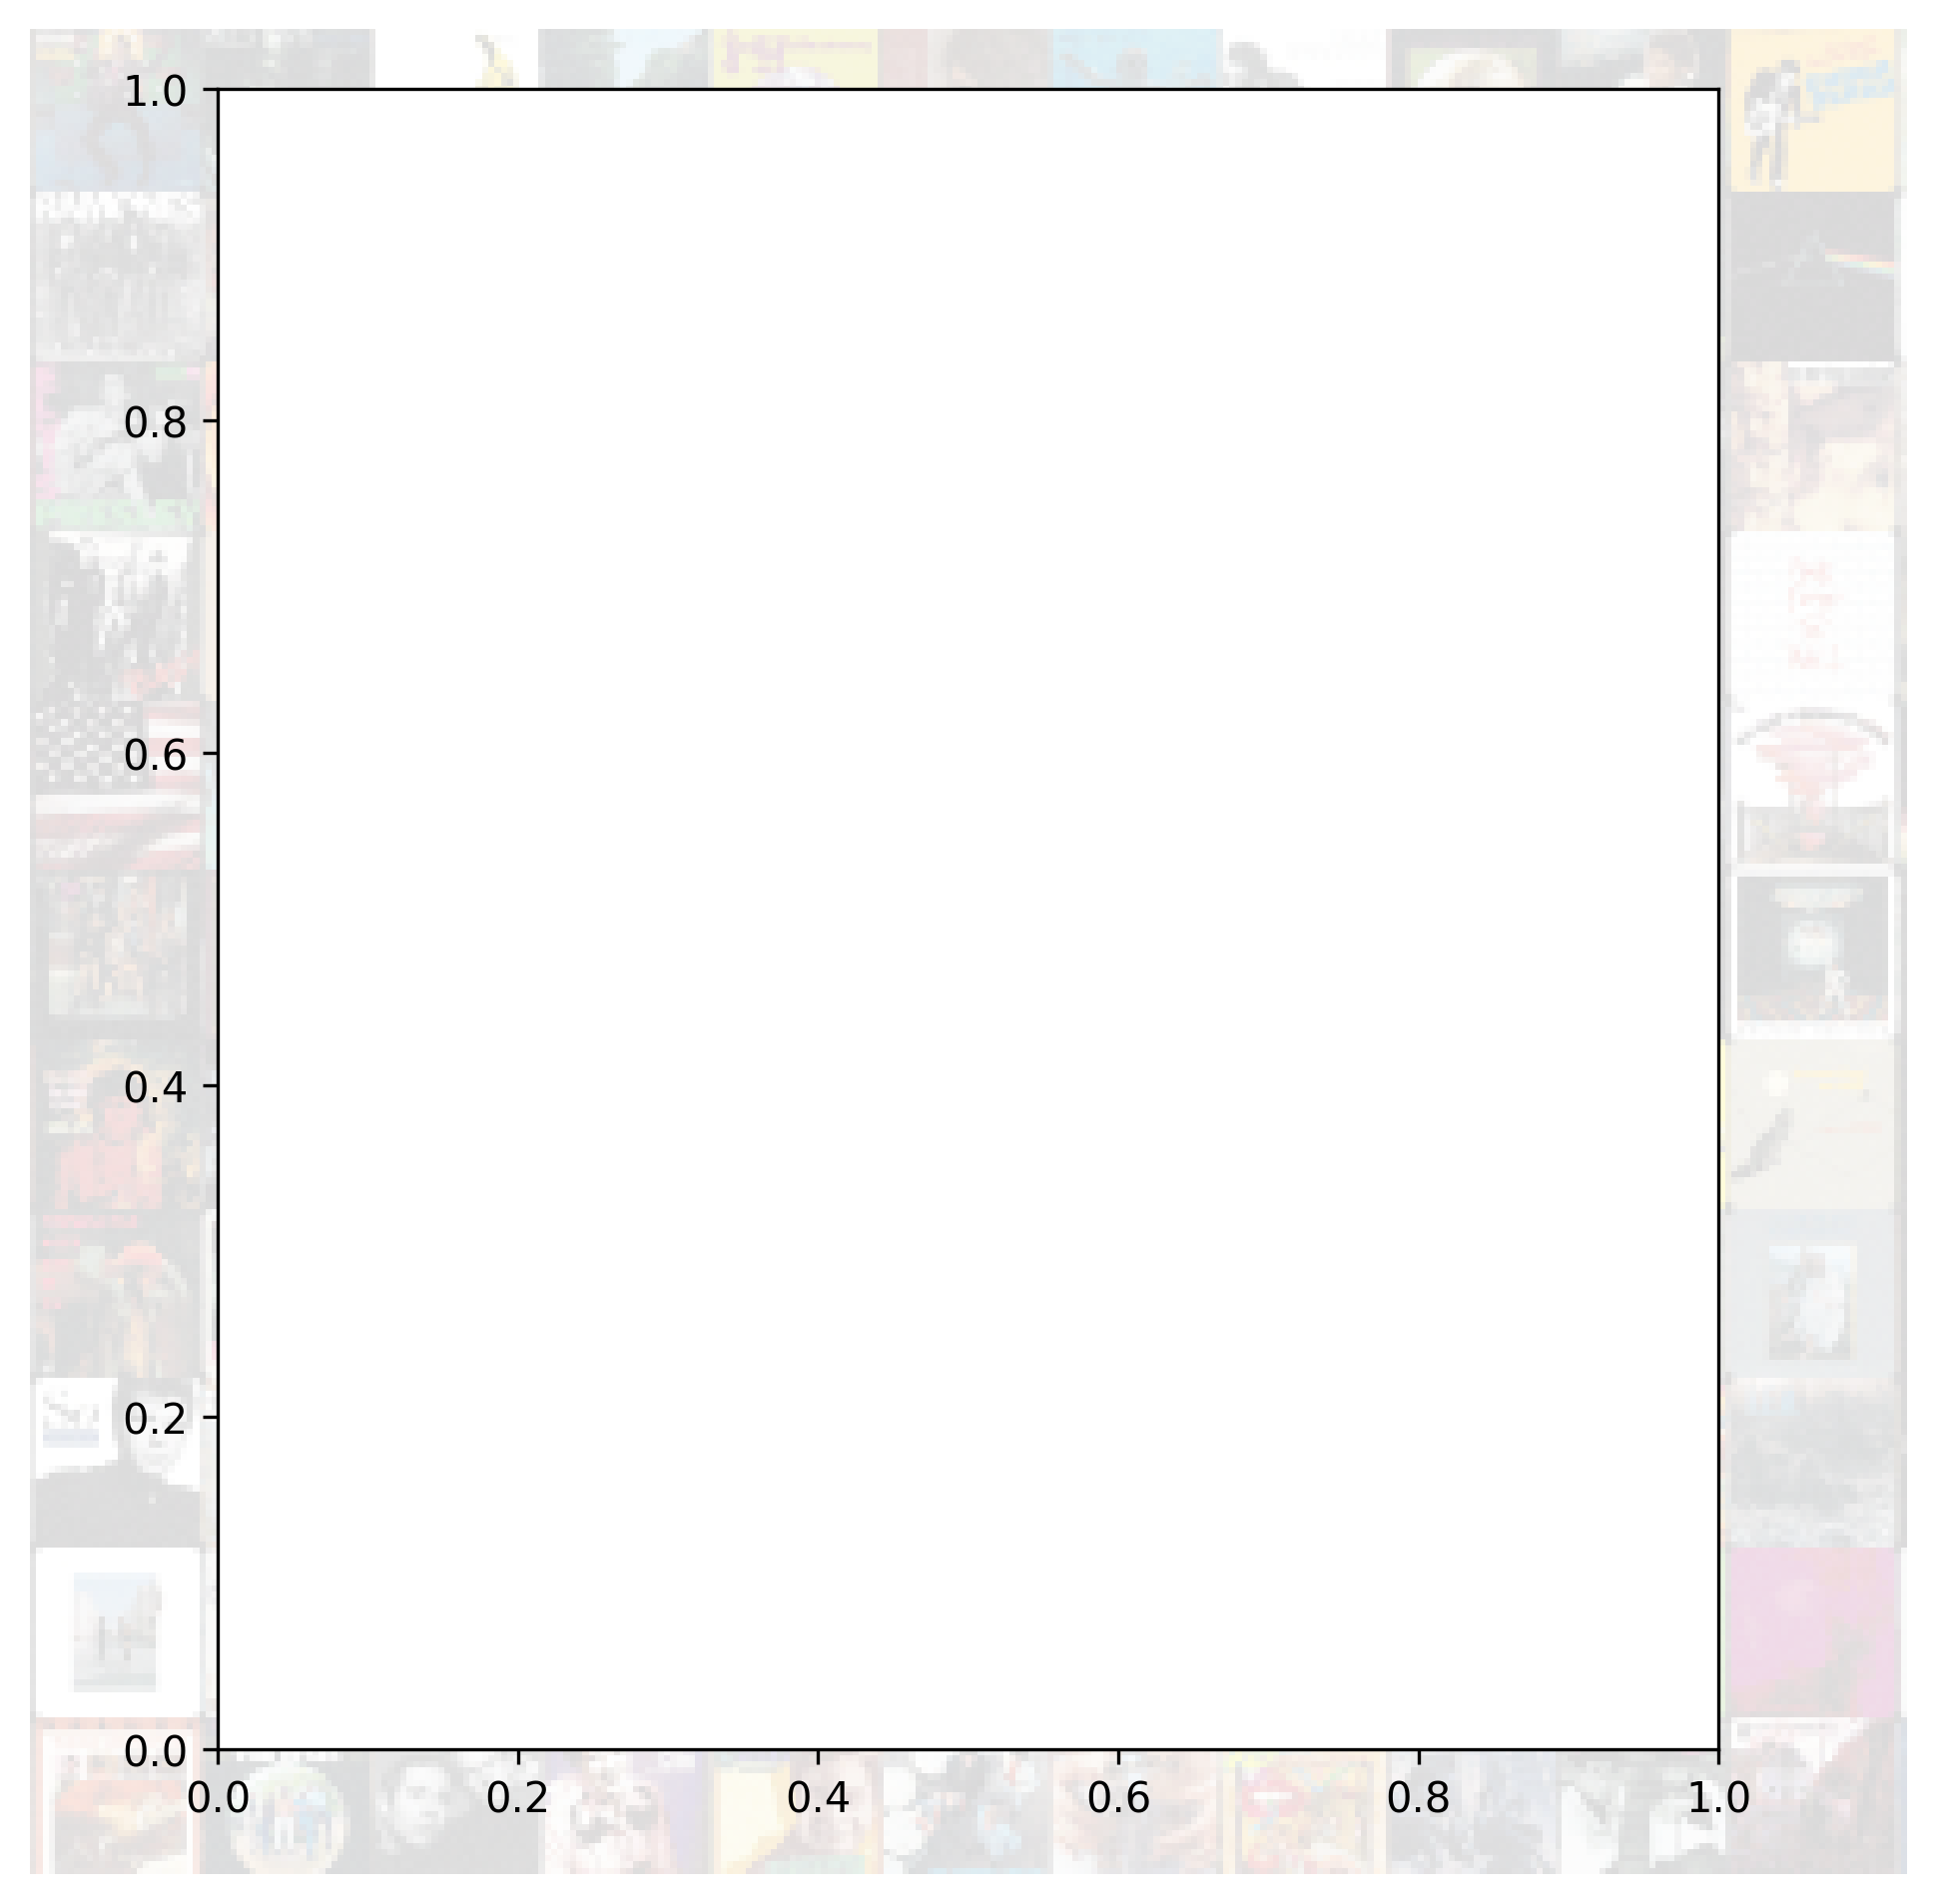

In [12]:
# open image
path_bg = '../../static/graph/background.png'
image_bg = np.array(Image.open(path_bg))

# create chart with background image
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
ax.imshow(image_bg, alpha=0.15)
ax.set_axis_off()

# create lollipop background
sub_ax = inset_axes(
    parent_axes=ax,
    width="80%",
    height="90%",
    loc='lower center',
    borderpad=3
)

# display plot
plt.show()

## Add lollipop plot

Then we add the lollipop in the inside axes using the `hlines()` and `plot()` functions.

The `hlines()` function is used to **draw the horizontal lines**, while the `plot()` function is used to draw the circles at the end of each line.


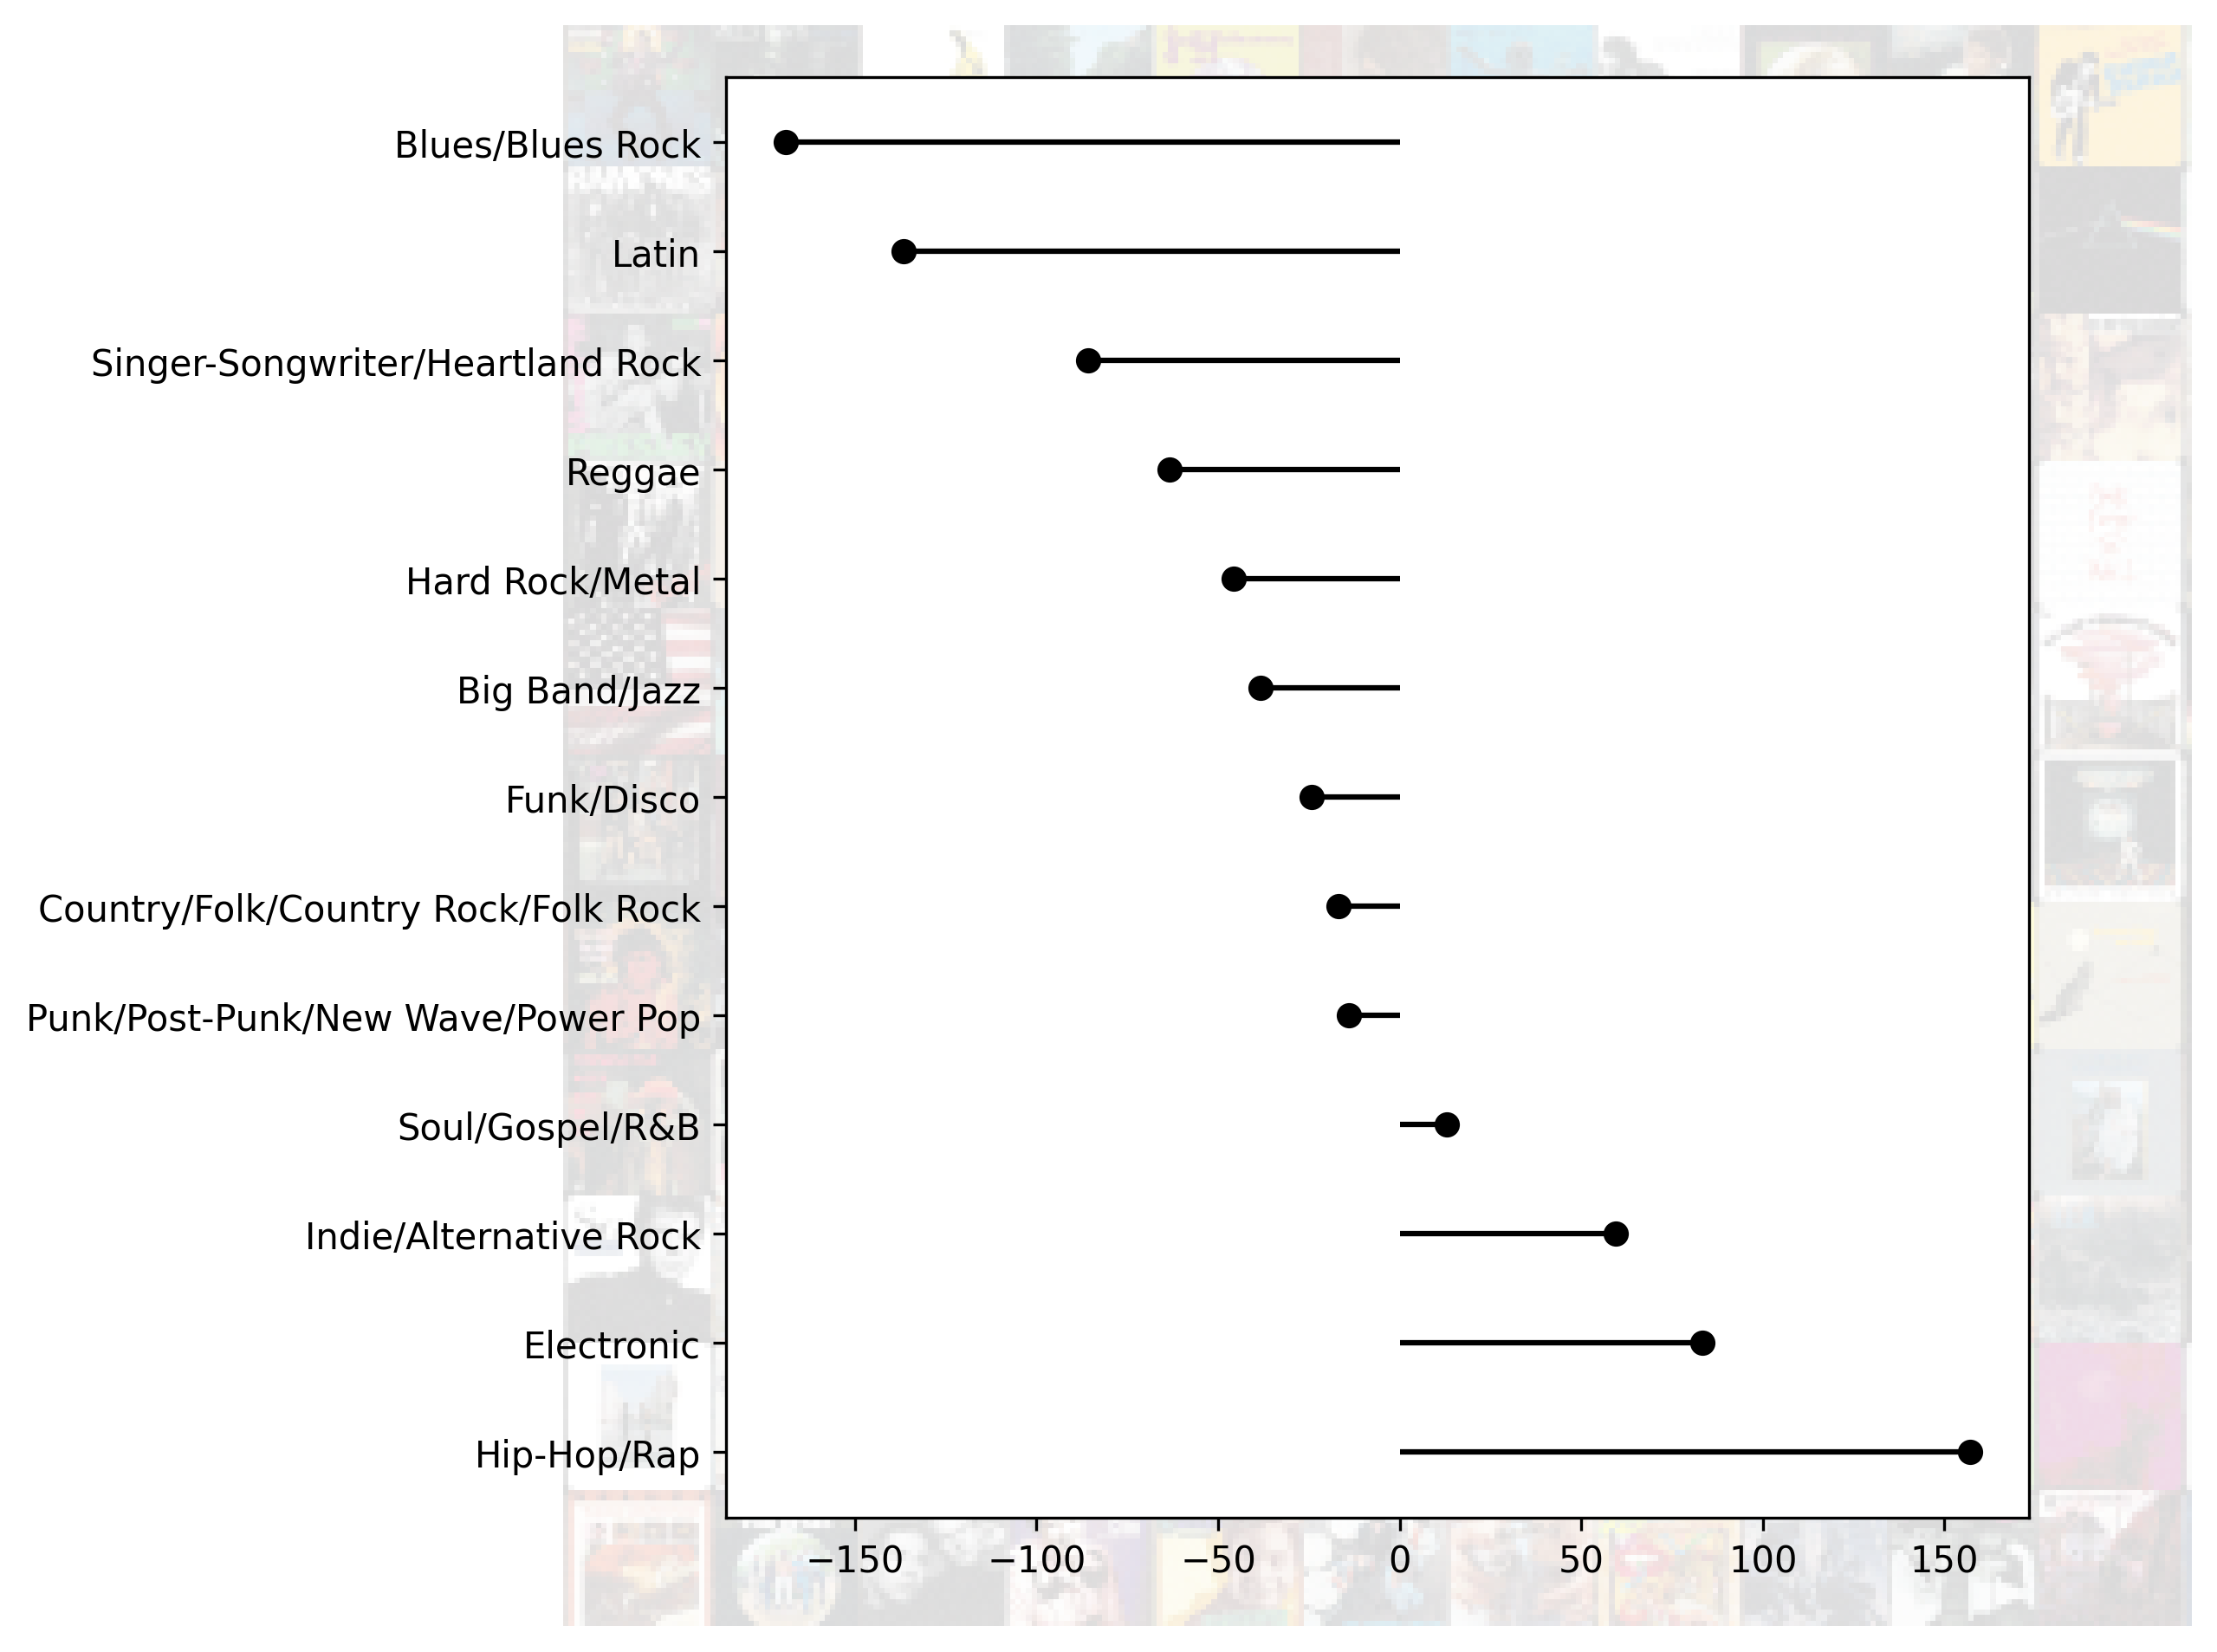

In [13]:
# open image
path_bg = '../../static/graph/background.png'
image_bg = np.array(Image.open(path_bg))

# create chart with background image
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
ax.imshow(image_bg, alpha=0.15)
ax.set_axis_off()

# create lollipop background
sub_ax = inset_axes(
    parent_axes=ax,
    width="80%",
    height="90%",
    loc='lower center',
    borderpad=3
)

# add lollipop chart
x = data['diff']
y = data['genre']
sub_ax.hlines(y=y, xmin=0, xmax=x, color='black')
sub_ax.plot(x, y, 'o', color='black', zorder=2)

# display plot
plt.show()

## Custom lollipop axes

Now we customize how the inside axes look like. We **remove** the ticks, the labels, and the left, right and top spines. We also set the background color to be **fully transparent**.


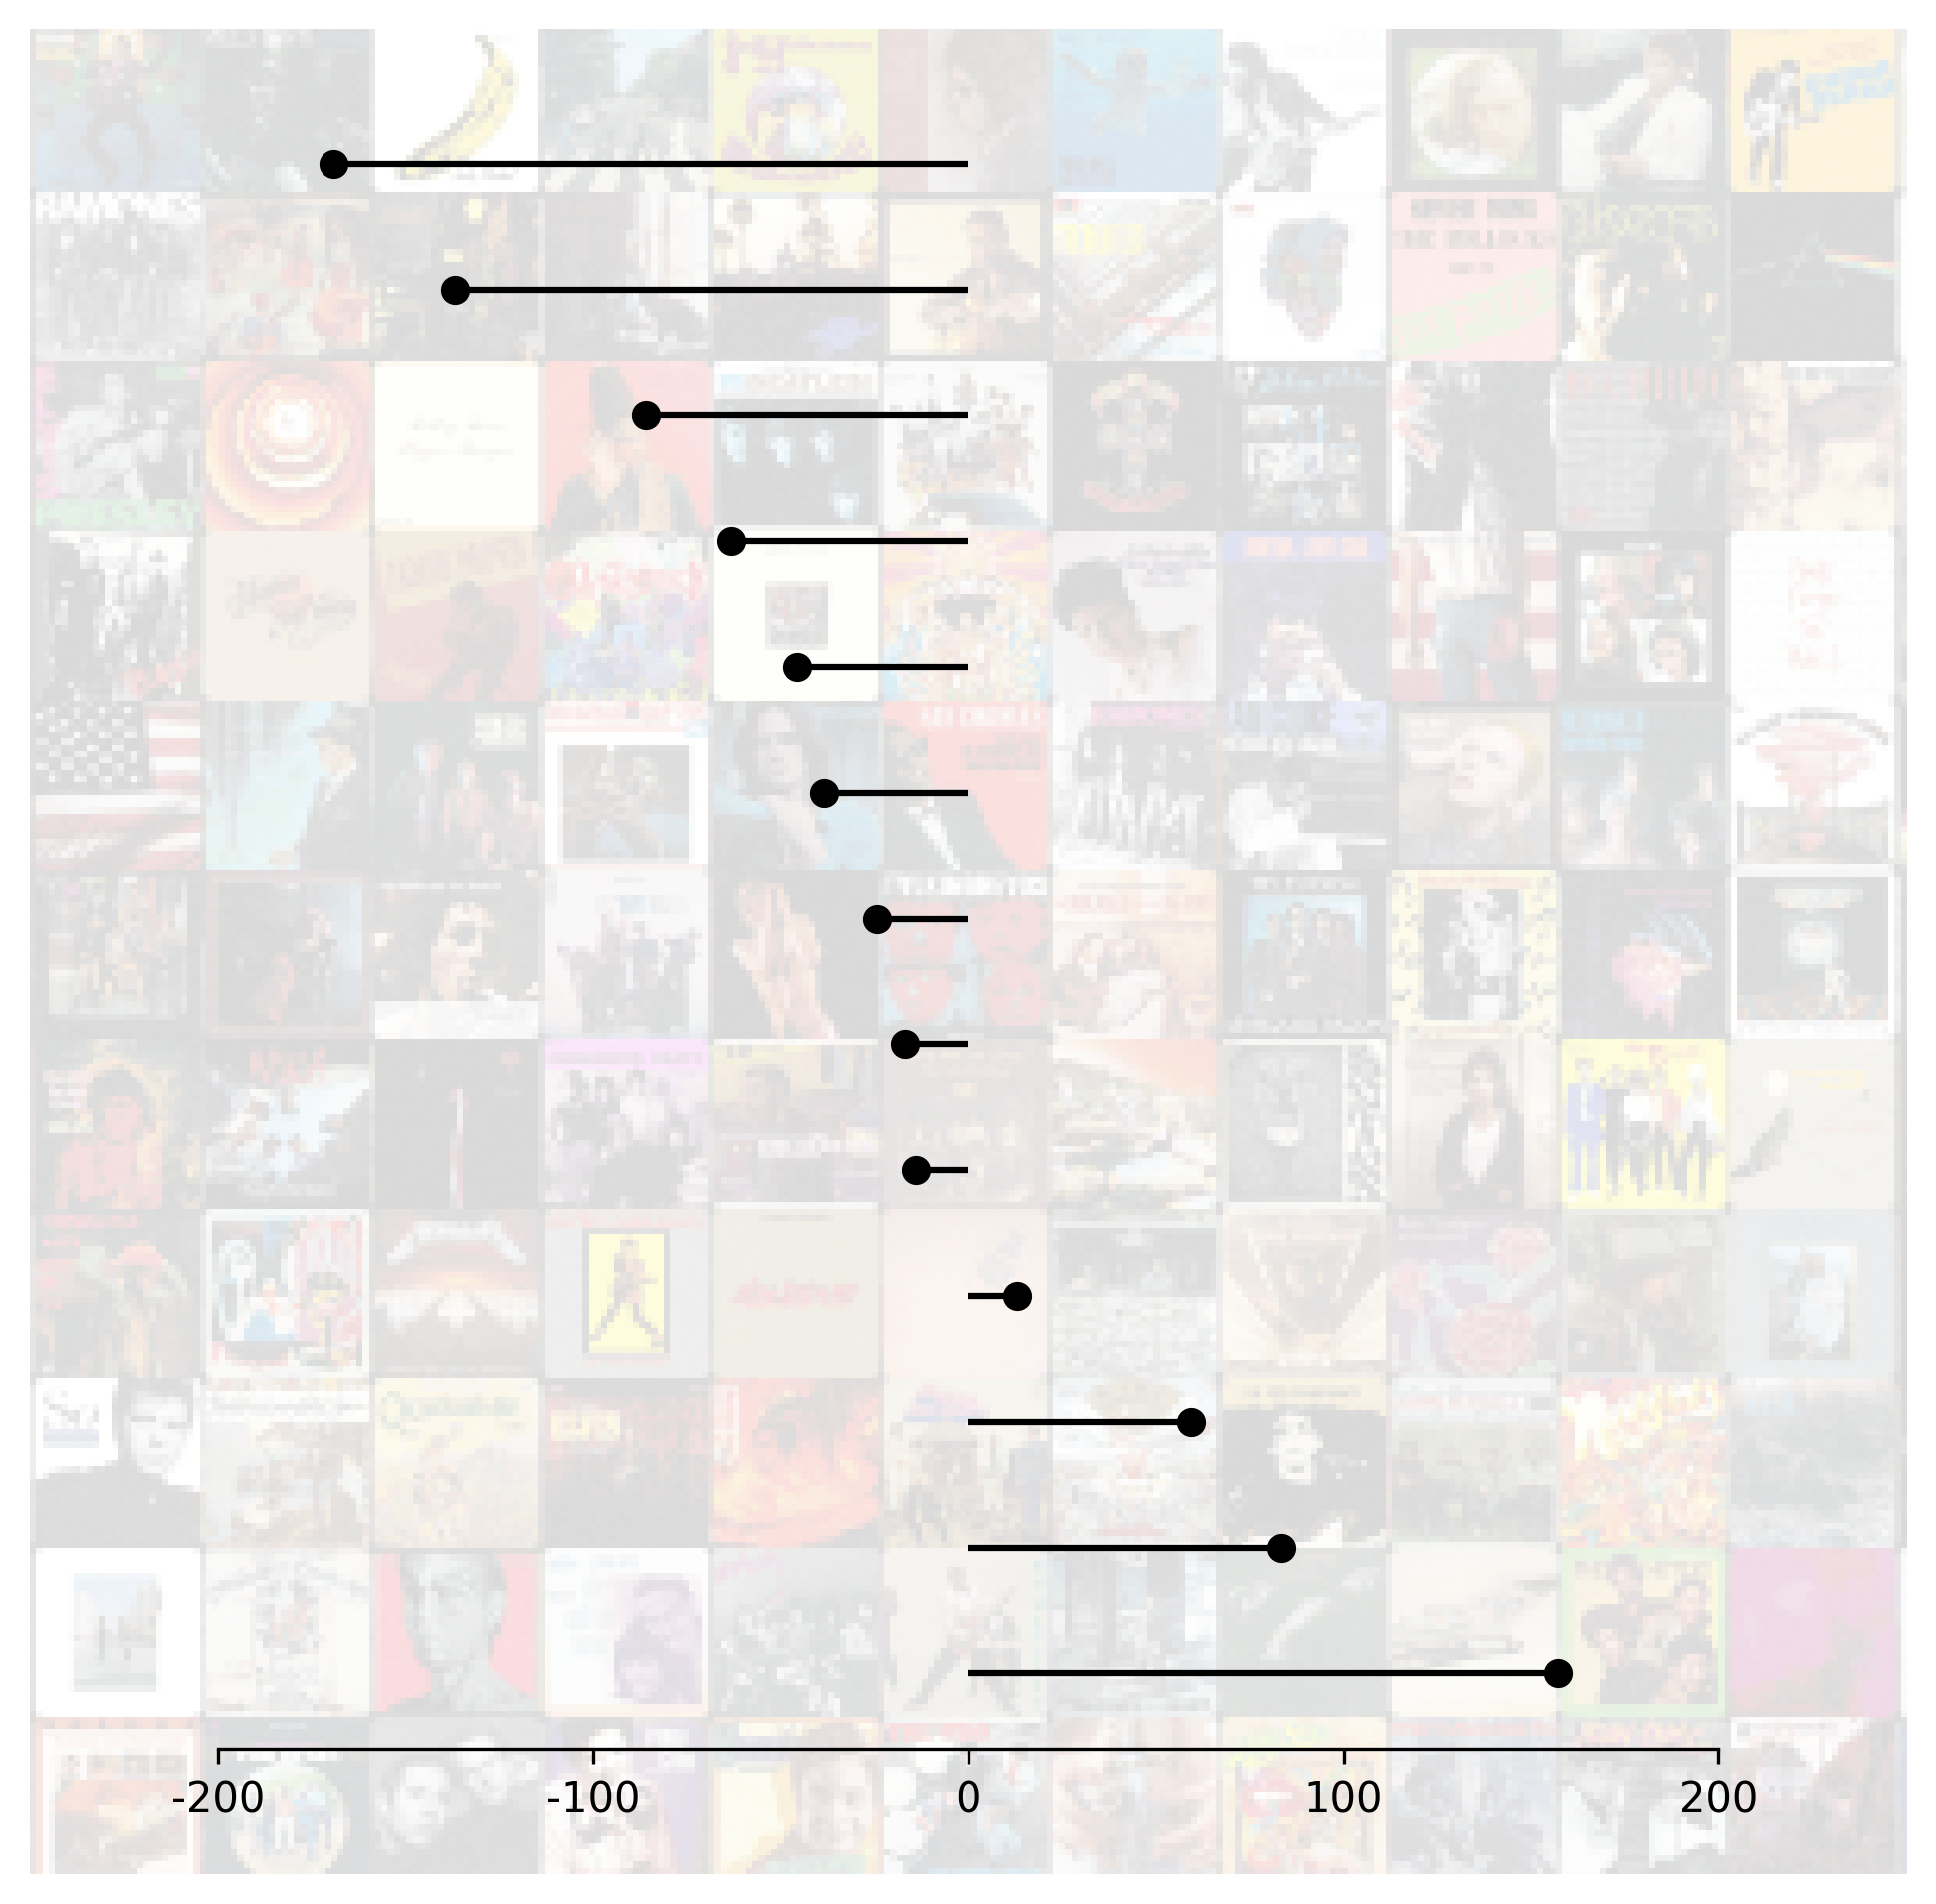

In [14]:
# open image
path_bg = '../../static/graph/background.png'
image_bg = np.array(Image.open(path_bg))

# create chart with background image
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
ax.imshow(image_bg, alpha=0.15)
ax.set_axis_off()

# create lollipop background
sub_ax = inset_axes(
    parent_axes=ax,
    width="80%",
    height="90%",
    loc='lower center',
    borderpad=3
)

# custom lollipop axes
sub_ax.set_xlim(-200, 200)
sub_ax.set_xticks([-200, -100, 0, 100, 200])
sub_ax.set_xticklabels(['-200', '-100', '0', '100', '200'])
sub_ax.set_yticklabels([])
sub_ax.set_yticks([])
sub_ax.spines[['top', 'left', 'right']].set_visible(False)
sub_ax.patch.set_alpha(0)

# add lollipop chart
x = data['diff']
y = data['genre']
sub_ax.hlines(y=y, xmin=0, xmax=x, color='black')
sub_ax.plot(x, y, 'o', color='black', zorder=2)

# display plot
plt.show()

## Add labels and reference line

We add a vertical line on the center of the chart for the 0 reference using the `axvline()` function.

For the labels, we:

- are **iterating through each row** of the data using enumerate to get the index and row data
- for each row, we **extract the genre** and **calculate the position** (x, y) where we want to place the label
- we **adjust the x position** for specific genres (Country, Punk, and Soul) to make sure the label appears near the vertical line.
- finally, we use the `ax_text()` function to **place the genre label** at the specified position with a certain font size, weight, alignment, color, and z-order in the given subplot (sub_ax).


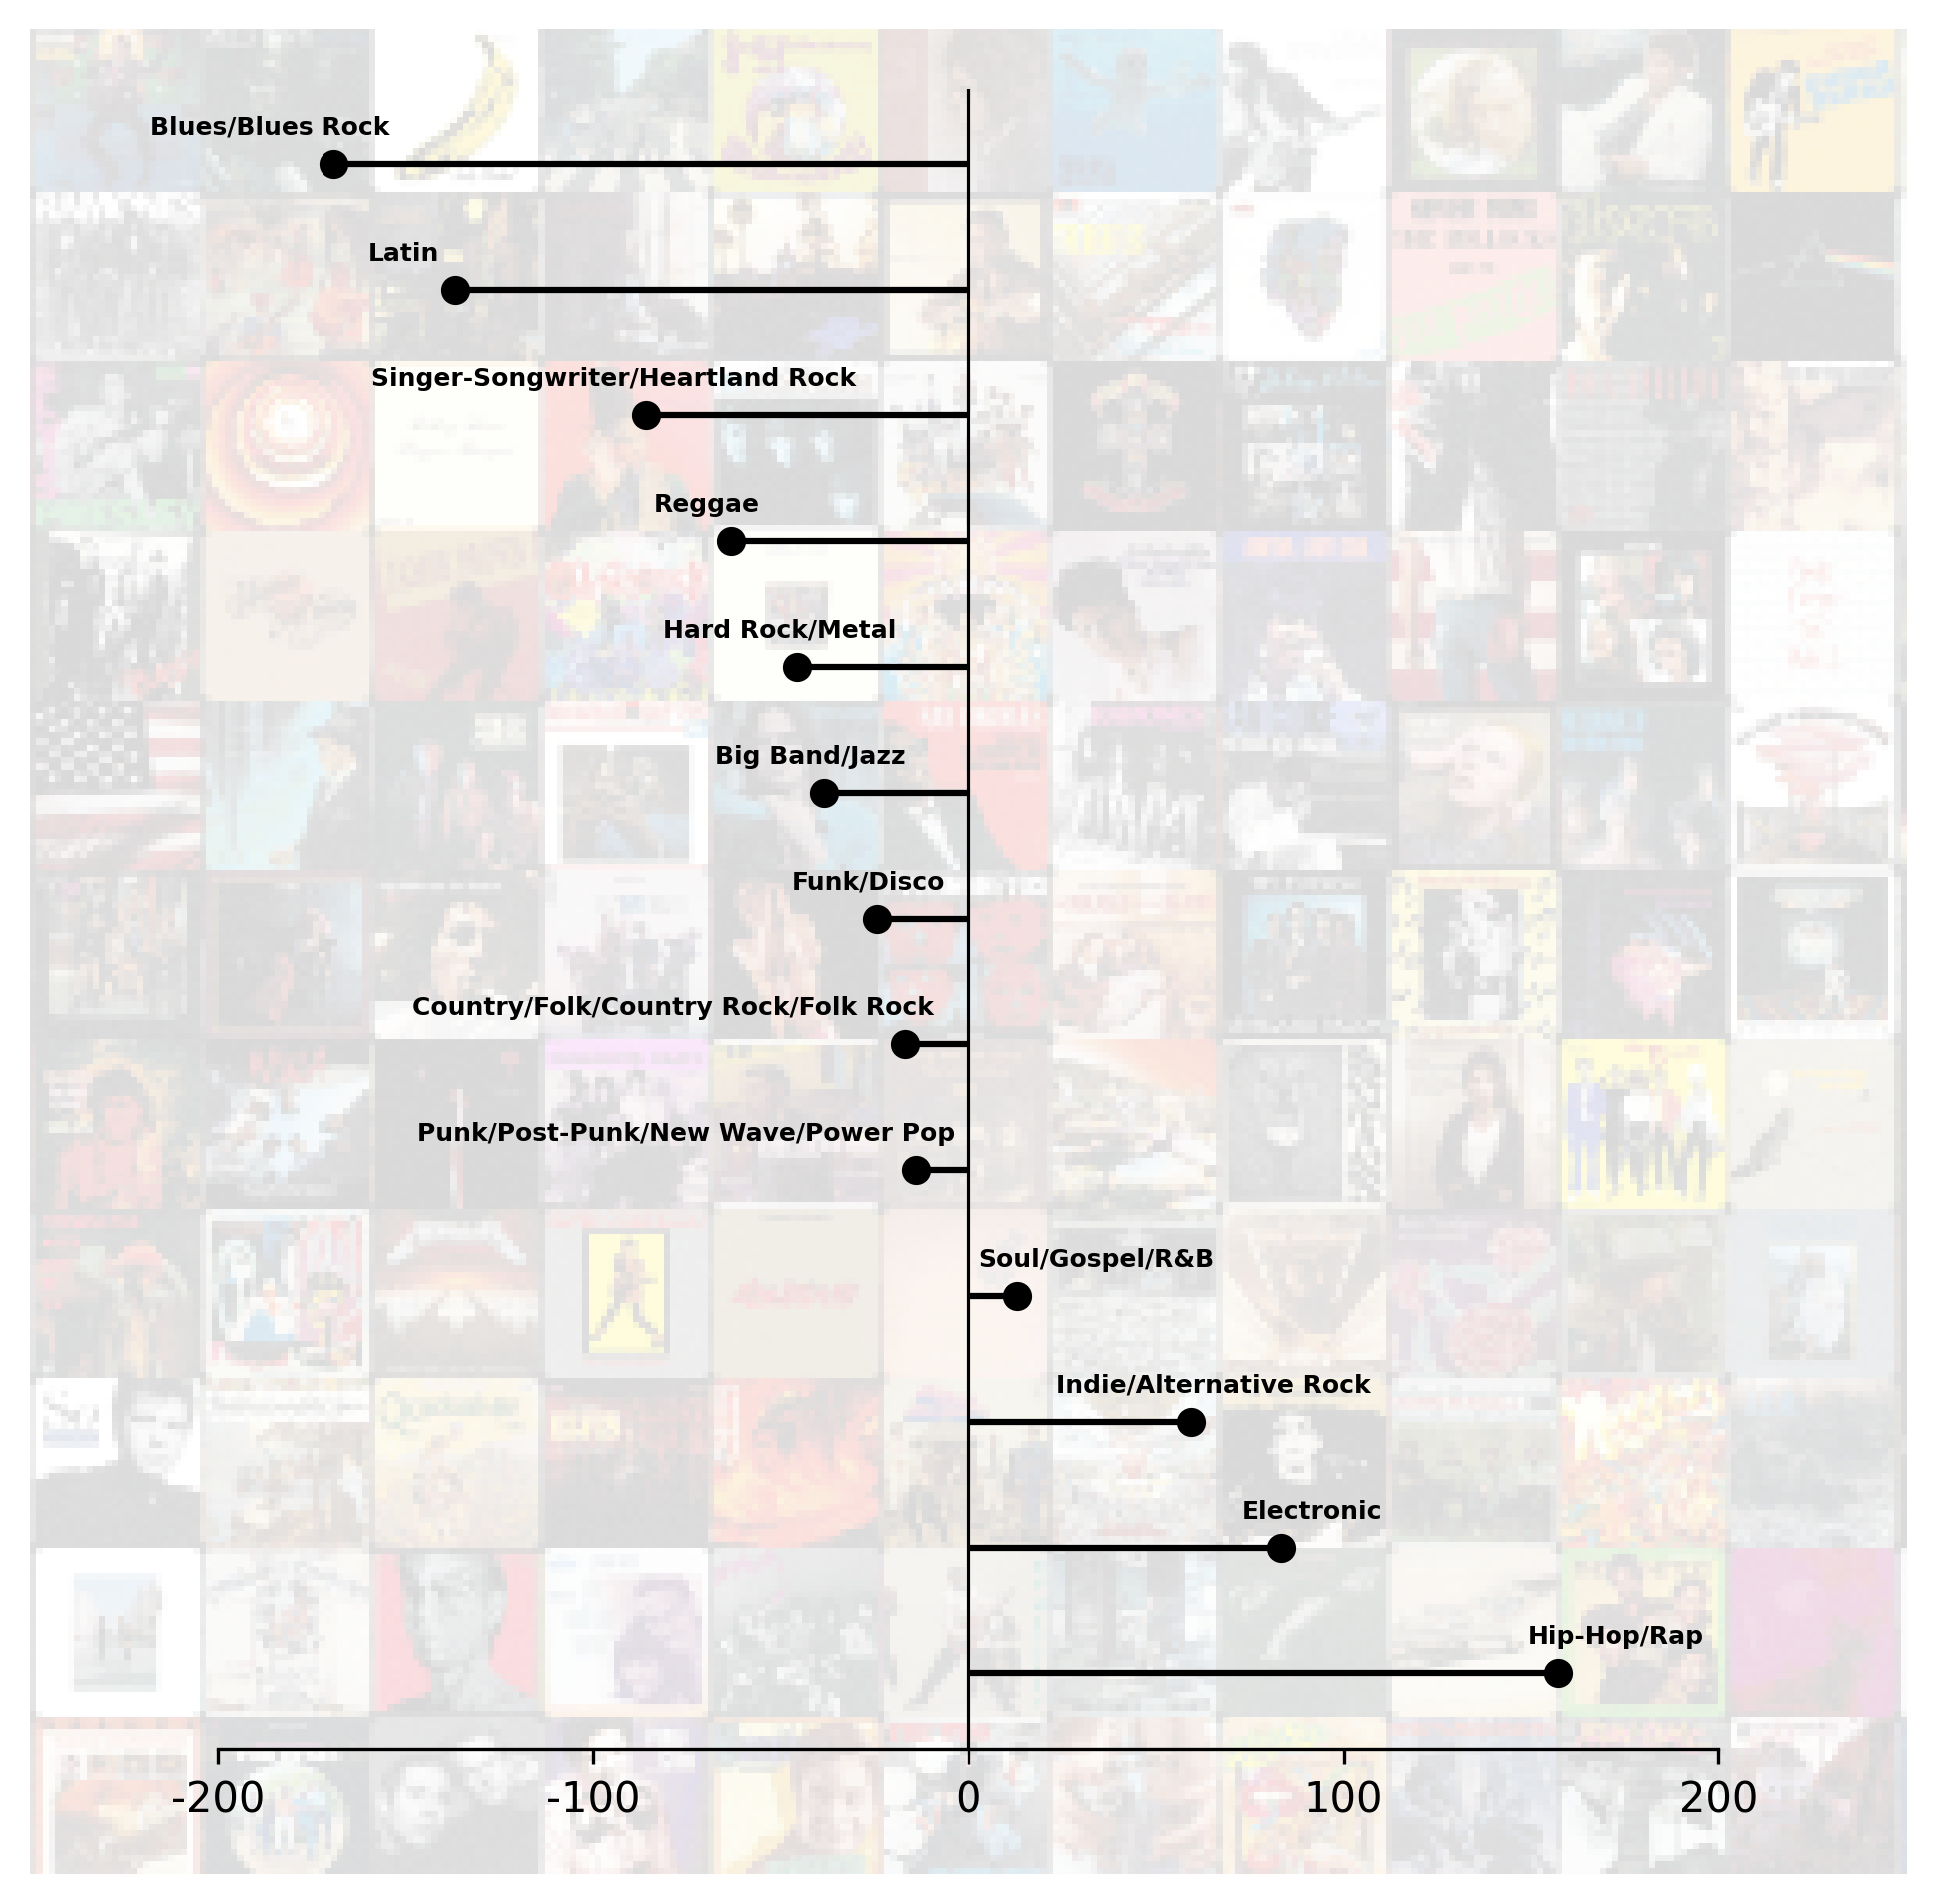

In [15]:
# open image
path_bg = '../../static/graph/background.png'
image_bg = np.array(Image.open(path_bg))

# create chart with background image
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
ax.imshow(image_bg, alpha=0.15)
ax.set_axis_off()

# create lollipop background
sub_ax = inset_axes(
    parent_axes=ax,
    width="80%",
    height="90%",
    loc='lower center',
    borderpad=3
)

# custom lollipop axes
sub_ax.set_xlim(-200, 200)
sub_ax.set_xticks([-200, -100, 0, 100, 200])
sub_ax.set_xticklabels(['-200', '-100', '0', '100', '200'])
sub_ax.set_yticklabels([])
sub_ax.set_yticks([])
sub_ax.spines[['top', 'left', 'right']].set_visible(False)
sub_ax.patch.set_alpha(0)

# add lollipop chart
x = data['diff']
y = data['genre']
sub_ax.hlines(y=y, xmin=0, xmax=x, color='black')
sub_ax.plot(x, y, 'o', color='black', zorder=2)

# reference vertical line
sub_ax.axvline(0, color='black', lw=1)

# label of each genre next to the lollipop
for i, row in enumerate(data.itertuples()):
    genre = row.genre
    x = row.diff * 1.1
    y = i + 0.3

    # special cases for label near the vertical line
    if genre.startswith('Country') or genre.startswith('Punk'):
        x -= 60
    if genre.startswith('Soul'):
        x += 20
    ax_text(
        x, y,
        genre,
        fontsize=6, fontweight='bold',
        va='center', ha='center',
        color='black',
        zorder=3,
        ax=sub_ax
    )

# display plot
plt.show()

## Annotations

The annotations are added using the `fig_text()` function from the [highlight_text](/advanced-custom-annotations-matplotlib) library. This function allows us to add text annotations to the figure with a specified position, font size, weight, alignment, color, and z-order.

There is no magic way to find the value of the positions. You need to **try and adjust** until you find the right position for your chart.


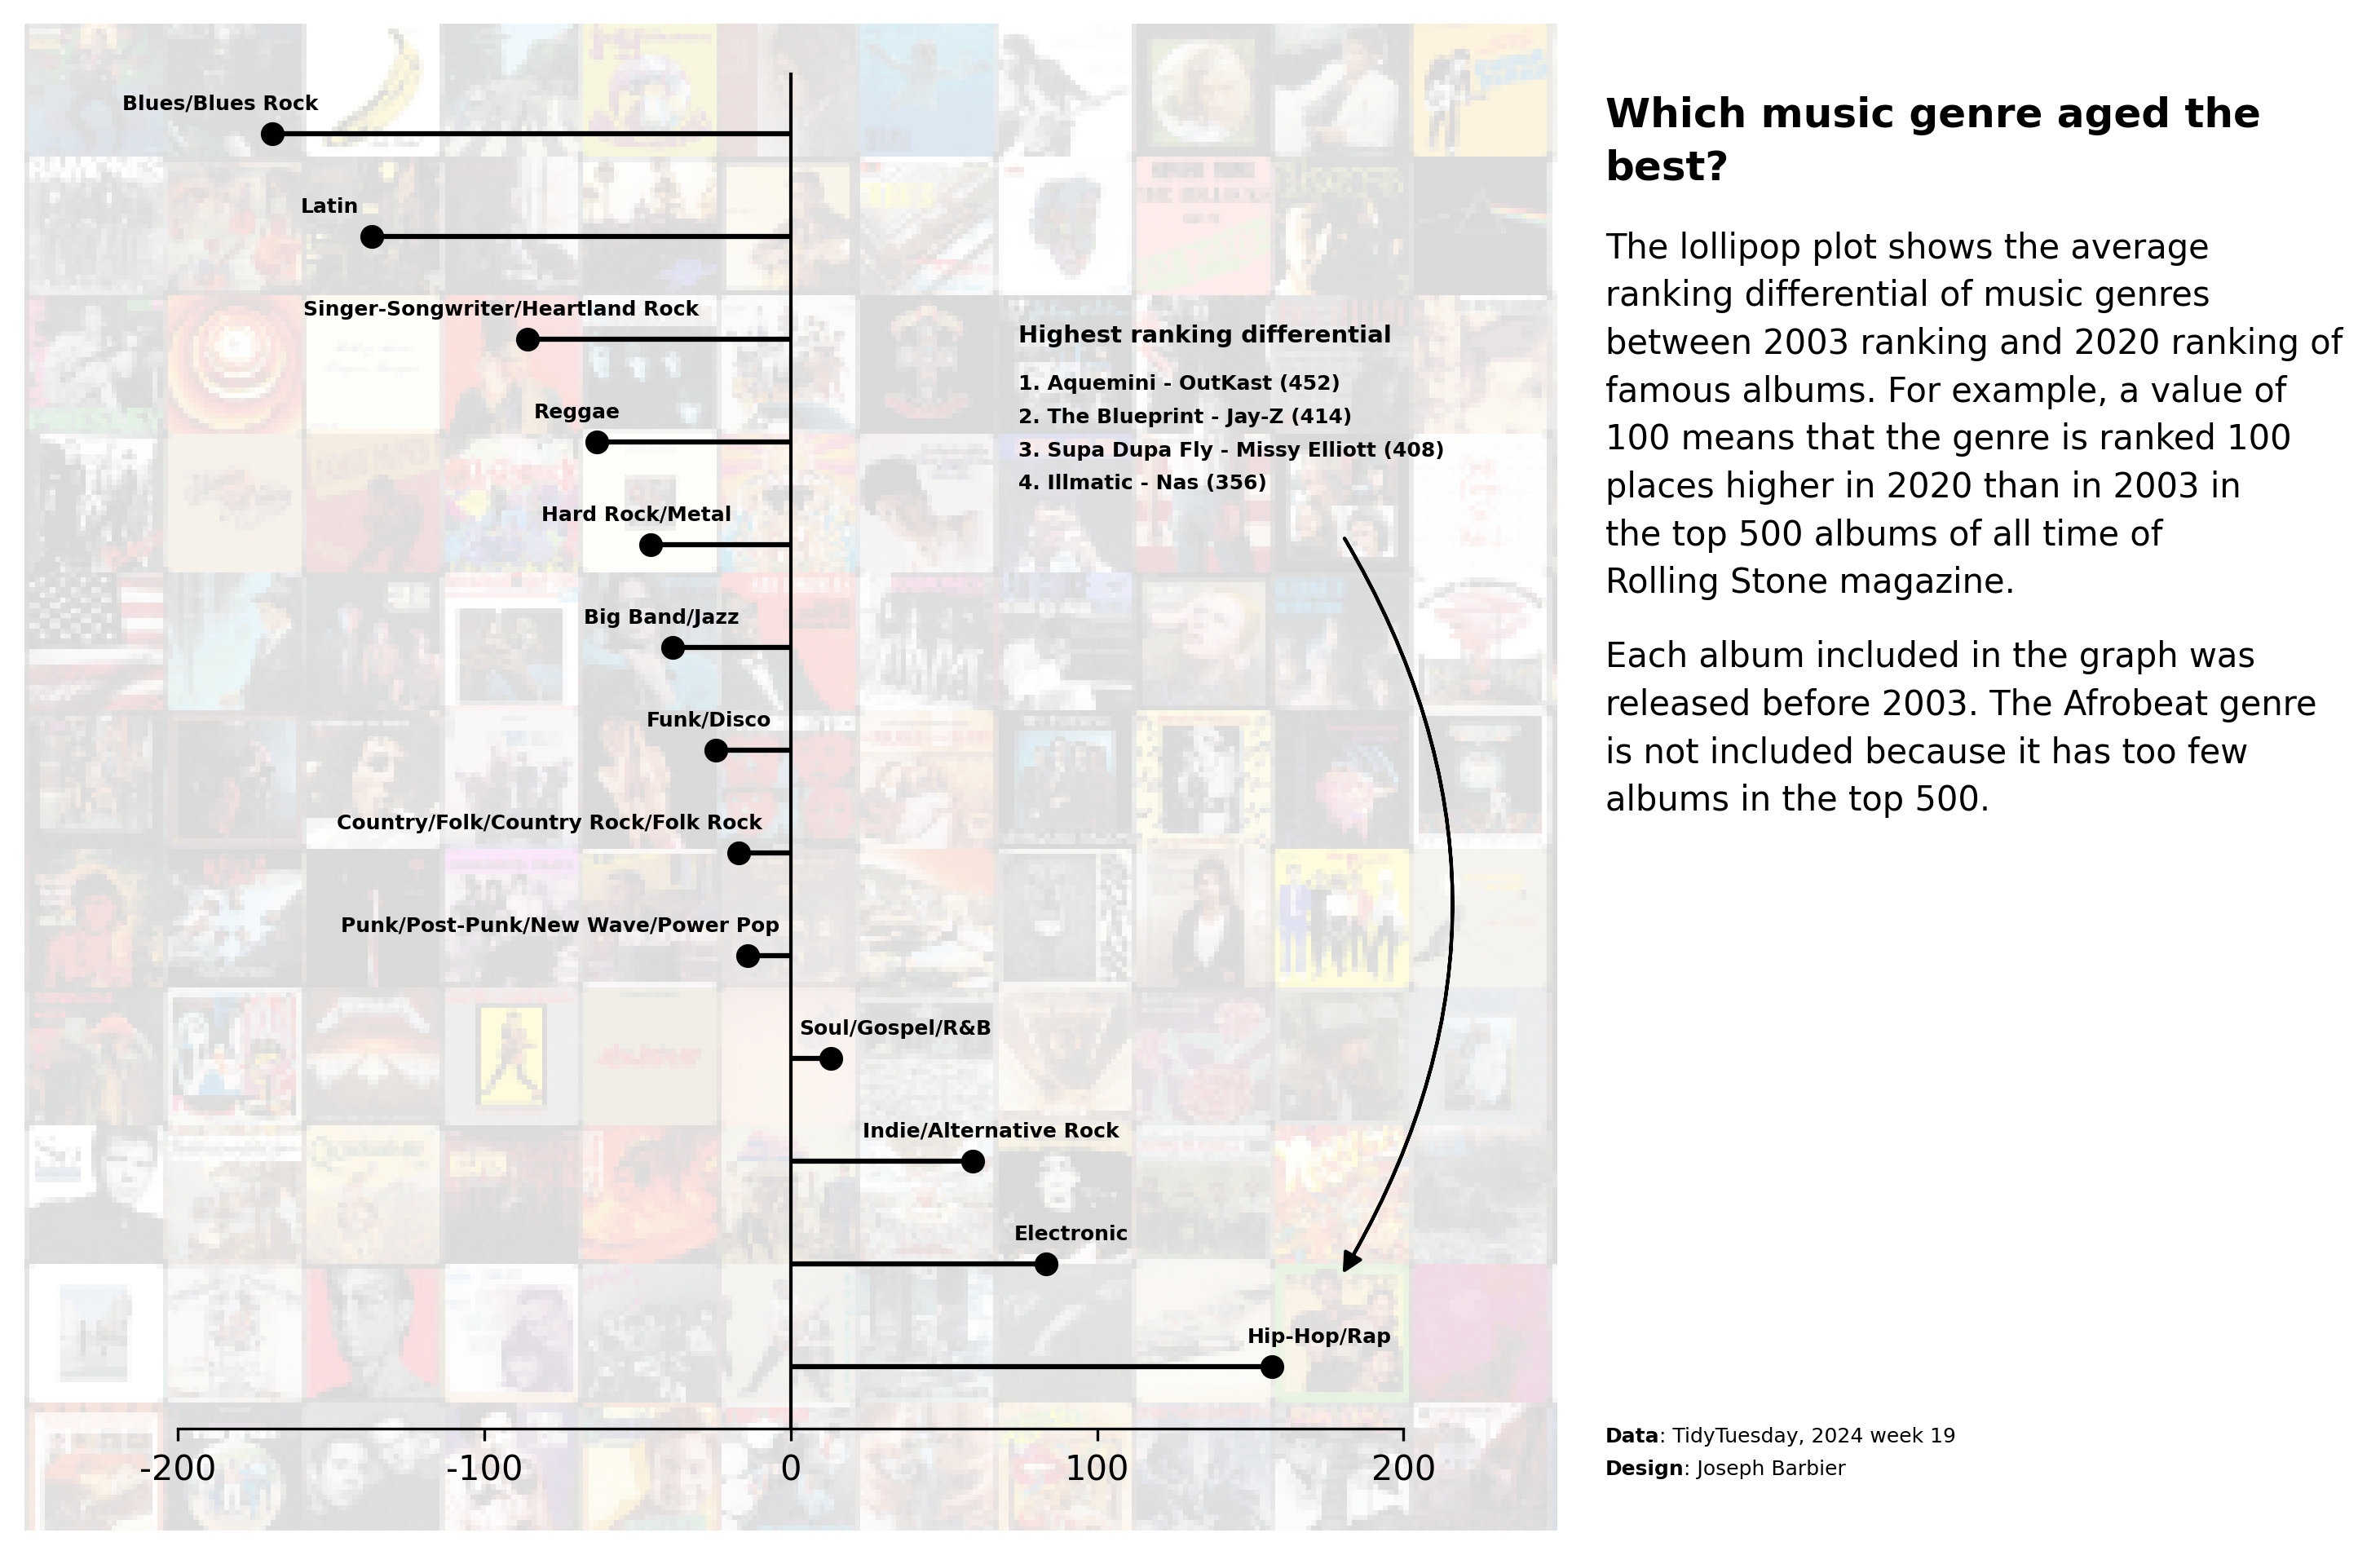

In [17]:
# open image
path_bg = '../../static/graph/background.png'
image_bg = np.array(Image.open(path_bg))

# create chart with background image
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
ax.imshow(image_bg, alpha=0.15)
ax.set_axis_off()

# create lollipop background
sub_ax = inset_axes(
    parent_axes=ax,
    width="80%",
    height="90%",
    loc='lower center',
    borderpad=3
)

# custom lollipop axes
sub_ax.set_xlim(-200, 200)
sub_ax.set_xticks([-200, -100, 0, 100, 200])
sub_ax.set_xticklabels(['-200', '-100', '0', '100', '200'])
sub_ax.set_yticklabels([])
sub_ax.set_yticks([])
sub_ax.spines[['top', 'left', 'right']].set_visible(False)
sub_ax.patch.set_alpha(0)

# add lollipop chart
x = data['diff']
y = data['genre']
sub_ax.hlines(y=y, xmin=0, xmax=x, color='black')
sub_ax.plot(x, y, 'o', color='black', zorder=2)

# reference vertical line
sub_ax.axvline(0, color='black', lw=1)

# label of each genre next to the lollipop
for i, row in enumerate(data.itertuples()):
    genre = row.genre
    x = row.diff * 1.1
    y = i + 0.3

    # special cases for label near the vertical line
    if genre.startswith('Country') or genre.startswith('Punk'):
        x -= 60
    if genre.startswith('Soul'):
        x += 20
    ax_text(
        x, y,
        genre,
        fontsize=6, fontweight='bold',
        va='center', ha='center',
        color='black',
        zorder=3,
        ax=sub_ax
    )

# annotation with images
text = """<Highest ranking differential>\n
1. Aquemini - OutKast (452)
2. The Blueprint - Jay-Z (414)
3. Supa Dupa Fly - Missy Elliott (408)
4. Illmatic - Nas (356)
"""
fig_text(
    0.59, 0.68,
    text,
    fontsize=6, fontweight='bold',
    va='center', ha='left',
    color='black',
    highlight_textprops=[
        {'fontsize': 7}
    ]
)

# credit
text = """
<Data>: TidyTuesday, 2024 week 19
<Design>: Joseph Barbier
"""
fig_text(
    0.79, 0.15,
    text, color='black',
    fontsize=6,
    va='center', ha='left',
    highlight_textprops=[
        {"fontweight": 'bold'},
        {"fontweight": 'bold'}
    ],
)

# title
text = "Which music genre aged the best?"
text = textwrap.fill(text, width=30)
fig_text(
    0.79, 0.82,
    text,
    fontsize=12,
    va='center', ha='left',
    fontweight='bold',
)

# description1
text = """The lollipop plot shows the average
ranking differential of music genres
between 2003 ranking and 2020 ranking
of famous albums.
For example, a value of 100 means
that the genre is ranked 100 places
higher in 2020 than in 2003 in the
top 500 albums of all time of Rolling
Stone magazine.
"""
text = textwrap.fill(text, width=40)
fig_text(
    0.79, 0.68,
    text,
    va='center', ha='left',
    fontsize=10,
    color='black',
)

# description2
text = """Each album included in the graph
was released before 2003. The Afrobeat
genre is not included because it has too
few albums in the top 500.
"""
text = textwrap.fill(text, width=40)
fig_text(
    0.79, 0.52,
    text,
    va='center', ha='left',
    fontsize=10,
    color='black',
)

# arrow
def draw_arrow(
   fig, tail_position, head_position,
   color='black', lw=1, radius=0.1, tail_width=0.01,
   head_width=5, head_length=5, invert=False,
   **kwargs
):
   arrow_style = f"Simple, tail_width={tail_width}, head_width={head_width}, head_length={head_length}"
   connection_style = f"arc3,rad={'-' if invert else ''}{radius}"
   arrow_patch = FancyArrowPatch(
      tail_position,
      head_position,
      connectionstyle=connection_style,
      transform=fig.transFigure,
      arrowstyle=arrow_style,
      color=color,
      lw=lw,
      **kwargs,
   )
   fig.patches.append(arrow_patch)
draw_arrow(fig, (0.7, 0.62), (0.7, 0.24), invert=True, radius=0.3)

# display plot
plt.show()

## Add small images for annotations

Finally, we add small images to the annotations using the `PIL` library. The images are loaded from a specified path and resized to fit the annotations.

Then we **create small axes** for each image with the `fig.add_axes()` function and display the image using the `imshow()` function.

_Warning: in order to open the images, you need to have them locally on your computer. You can find them in this directory of the [GitHub repository](https://github.com/holtzy/The-Python-Graph-Gallery/tree/master/static/graph)._


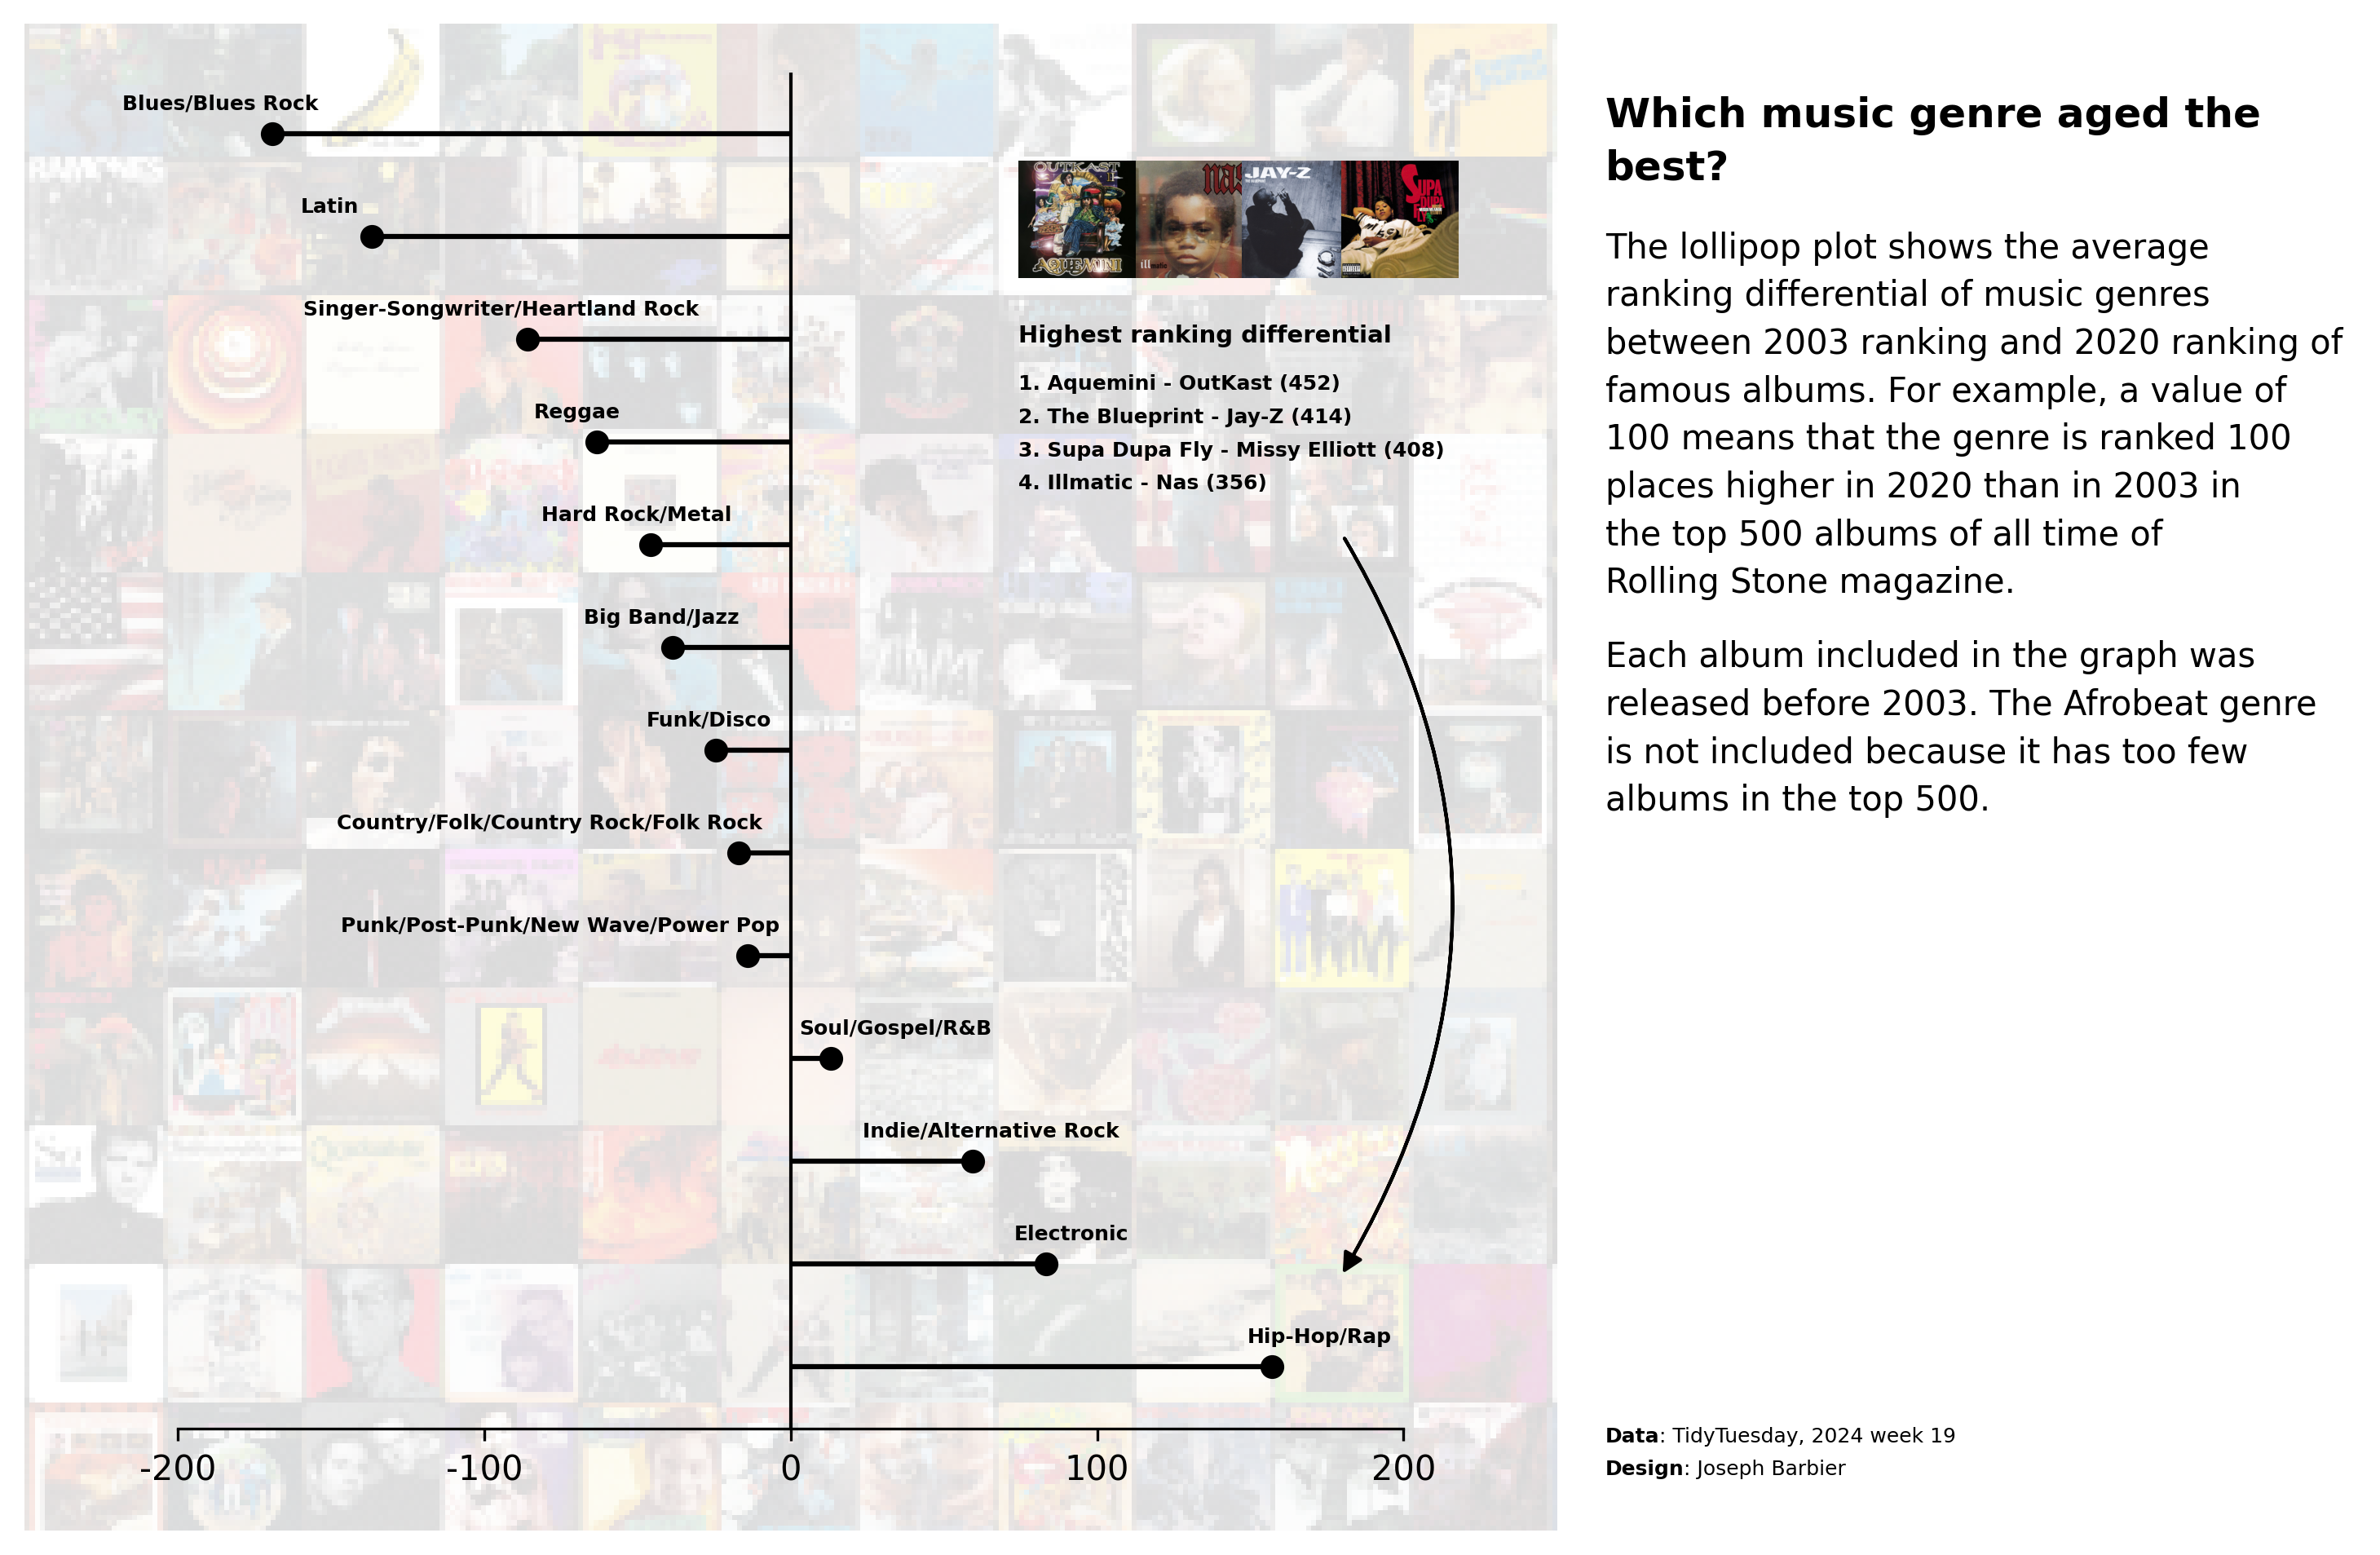

In [22]:
# open img of rap albums
top_rap_album1 = '../../static/graph/AqueminiOutKast.jpg'
image_rap1 = np.array(Image.open(top_rap_album1))
top_rap_album2 = '../../static/graph/nas-illmatic.jpg'
image_rap2 = np.array(Image.open(top_rap_album2))
top_rap_album3 = '../../static/graph/jay-z-the-blueprint.jpg'
image_rap3 = np.array(Image.open(top_rap_album3))
top_rap_album4 = '../../static/graph/Missy_Elliott_Supa_Dupa_Fly.jpg'
image_rap4 = np.array(Image.open(top_rap_album4))

# open image
path_bg = '../../static/graph/background.png'
image_bg = np.array(Image.open(path_bg))

# create chart with background image
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
ax.imshow(image_bg, alpha=0.15)
ax.set_axis_off()

# create lollipop background
sub_ax = inset_axes(
    parent_axes=ax,
    width="80%",
    height="90%",
    loc='lower center',
    borderpad=3
)

# add images
ax_image1 = fig.add_axes([0.58, 0.75, 0.06, 0.06], zorder=4)
ax_image1.imshow(image_rap1)  # display
ax_image1.set_axis_off()  # remove axis

ax_image2 = fig.add_axes([0.62, 0.75, 0.06, 0.06], zorder=4)
ax_image2.imshow(image_rap2)  # display
ax_image2.set_axis_off()  # remove axis

ax_image3 = fig.add_axes([0.655, 0.75, 0.06, 0.06], zorder=4)
ax_image3.imshow(image_rap3)  # display
ax_image3.set_axis_off()  # remove axis

ax_image4 = fig.add_axes([0.69, 0.75, 0.06, 0.06], zorder=4)
ax_image4.imshow(image_rap4)  # display
ax_image4.set_axis_off()  # remove axis

# custom lollipop axes
sub_ax.set_xlim(-200, 200)
sub_ax.set_xticks([-200, -100, 0, 100, 200])
sub_ax.set_xticklabels(['-200', '-100', '0', '100', '200'])
sub_ax.set_yticklabels([])
sub_ax.set_yticks([])
sub_ax.spines[['top', 'left', 'right']].set_visible(False)
sub_ax.patch.set_alpha(0)

# add lollipop chart
x = data['diff']
y = data['genre']
sub_ax.hlines(y=y, xmin=0, xmax=x, color='black')
sub_ax.plot(x, y, 'o', color='black', zorder=2)

# reference vertical line
sub_ax.axvline(0, color='black', lw=1)

# label of each genre next to the lollipop
for i, row in enumerate(data.itertuples()):
    genre = row.genre
    x = row.diff * 1.1
    y = i + 0.3

    # special cases for label near the vertical line
    if genre.startswith('Country') or genre.startswith('Punk'):
        x -= 60
    if genre.startswith('Soul'):
        x += 20
    ax_text(
        x, y,
        genre,
        fontsize=6, fontweight='bold',
        va='center', ha='center',
        color='black',
        zorder=3,
        ax=sub_ax
    )

# annotation with images
text = """<Highest ranking differential>\n
1. Aquemini - OutKast (452)
2. The Blueprint - Jay-Z (414)
3. Supa Dupa Fly - Missy Elliott (408)
4. Illmatic - Nas (356)
"""
fig_text(
    0.59, 0.68,
    text,
    fontsize=6, fontweight='bold',
    va='center', ha='left',
    color='black',
    highlight_textprops=[
        {'fontsize': 7}
    ]
)

# credit
text = """
<Data>: TidyTuesday, 2024 week 19
<Design>: Joseph Barbier
"""
fig_text(
    0.79, 0.15,
    text, color='black',
    fontsize=6,
    va='center', ha='left',
    highlight_textprops=[
        {"fontweight": 'bold'},
        {"fontweight": 'bold'}
    ],
)

# title
text = "Which music genre aged the best?"
text = textwrap.fill(text, width=30)
fig_text(
    0.79, 0.82,
    text,
    fontsize=12,
    va='center', ha='left',
    fontweight='bold',
)

# description1
text = """The lollipop plot shows the average
ranking differential of music genres
between 2003 ranking and 2020 ranking
of famous albums.
For example, a value of 100 means
that the genre is ranked 100 places
higher in 2020 than in 2003 in the
top 500 albums of all time of Rolling
Stone magazine.
"""
text = textwrap.fill(text, width=40)
fig_text(
    0.79, 0.68,
    text,
    va='center', ha='left',
    fontsize=10,
    color='black',
)

# description2
text = """Each album included in the graph
was released before 2003. The Afrobeat
genre is not included because it has too
few albums in the top 500.
"""
text = textwrap.fill(text, width=40)
fig_text(
    0.79, 0.52,
    text,
    va='center', ha='left',
    fontsize=10,
    color='black',
)

# arrow
def draw_arrow(
   fig, tail_position, head_position,
   color='black', lw=1, radius=0.1, tail_width=0.01,
   head_width=5, head_length=5, invert=False,
   **kwargs
):
   arrow_style = f"Simple, tail_width={tail_width}, head_width={head_width}, head_length={head_length}"
   connection_style = f"arc3,rad={'-' if invert else ''}{radius}"
   arrow_patch = FancyArrowPatch(
      tail_position,
      head_position,
      connectionstyle=connection_style,
      transform=fig.transFigure,
      arrowstyle=arrow_style,
      color=color,
      lw=lw,
      **kwargs,
   )
   fig.patches.append(arrow_patch)
draw_arrow(fig, (0.7, 0.62), (0.7, 0.24), invert=True, radius=0.3)

# display plot
plt.savefig('../../static/graph/web-lollipop-with-background-image.png', dpi=300, bbox_inches='tight')
plt.show()

## Going further

This post explains how to create a [lollipop plot](/lollipop-plot) with [matplotlib](/matplotlib).

You might also be interested in

- this [great dumbell chart](/web-dumbell-chart), which is a variation of the lollipop plot
- this [other really cool lollipop plot](/web-lollipop-plot-with-python-mario-kart-64-world-records) about Mario Kart 64 world records
